In [1]:
import numpy as np
import pandas as pd
import copy
import os 
import pickle
import glmnet

from sklearn.decomposition import PCA
from scripts.utils_ import load_data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### plot dataset stats

In [2]:
dataset = pd.read_csv("./data/dataset_description.csv")
dataset.groupby(['type']).count()

,Unnamed: 0,swc,path,ds_id
type,,,,
BC,28,28,28,28
BPC,12,12,12,12
DBC,12,12,12,12
HEC,8,8,8,8
MC,12,12,12,12
NFC,9,9,9,9
SC,11,11,11,11
SOM L4 S1,8,8,8,8


In [4]:
v1_morph = pd.read_csv("./results/classification/two_features_full__res_MC_BC_SC_DBC_BPC_HEC_NFC_alpha_05.csv")
v1_ephys = pd.read_csv("./results/classification/ephys.csv")

del v1_morph['Unnamed: 0']
del v1_ephys['Unnamed: 0']

# Plot performance matrix for V1: morphology

## all 

In [5]:
data = copy.copy(v1_morph)

s='avg_test_score'
p = data.pivot_table(index='group_a', columns='group_b', values=s, fill_value=0)
index = p.index.union(p.columns).values
order = ['BC','DBC','SC','HEC','MC','BPC', 'NFC']
p = p.reindex(index=order, columns=order, fill_value=0)

r = p.values
r = r + r.T

Text(0.5,1,'Classification: Morphology full')

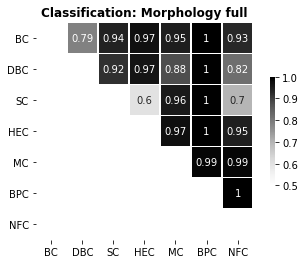

In [6]:

mask = np.zeros_like(p, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(r, mask=mask, cmap='Greys', vmin=.5, vmax=1, center=.75, square=True, linewidths=.5,
                   cbar_kws={"shrink": .5}, annot=True)
plt.gca().set_xticklabels(order, rotation=0)
plt.xlabel('')
plt.gca().set_yticklabels(order, rotation=0)
plt.ylabel('')
plt.title('Classification: Morphology full', weight='bold')

In [7]:
np.mean(p.values[p.values != 0])

0.9202755102040816

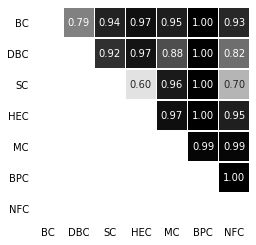

In [8]:
mask = np.zeros_like(p, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(r, mask=mask, cmap='Greys', vmin=.5, vmax=1, center=.75, square=True, linewidths=.5,
                   cbar=False, annot=True,fmt='.2f')
plt.gca().set_xticklabels(order, rotation=0)
plt.xlabel('')
plt.gca().set_yticklabels(order, rotation=0)
plt.ylabel('')
plt.gca().tick_params(axis='both', which='both', length=0)
plt.savefig('./pics/paper/classification_morphology_full_neuron.svg')
plt.savefig('./pics/paper/classification_morphology_full_neuron.png')

## Plot performance matrix for V1: ephys

In [50]:
data = copy.copy(v1_ephys)

data.loc[data['group_a'] == 'sBC','group_a'] = 'SC'
data.loc[data['group_b'] == 'sBC','group_b'] = 'SC'

data.loc[data['group_a'] == 'NFG','group_a'] = 'NFC'
data.loc[data['group_b'] == 'NFG','group_b'] = 'NFC'

s='avg_test_score'
p = data.pivot_table(index='group_a', columns='group_b', values=s, fill_value=0)
index = p.index.union(p.columns).values
order = ['PYR','BC','DBC','SC','HEC','MC','BPC', 'NFC']
p = p.reindex(index=order, columns=order, fill_value=0)

r = p.values
r = r + r.T

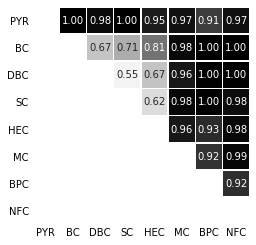

In [51]:

mask = np.zeros_like(p, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(r,mask=mask, cmap='Greys', vmin=.5, vmax=1, center=.75, square=True, linewidths=.5,
                   cbar=False, annot=True, fmt='.2f')
plt.gca().set_xticklabels(order, rotation=0)
plt.xlabel('')

plt.gca().set_yticklabels(order, rotation=0)
plt.ylabel('')
plt.gca().tick_params(axis='both', which='both', length=0)
#plt.title('Classification: Ephys', weight='bold')
plt.savefig('./pics/paper/ephys_classification.svg')


In [33]:
values = p.values[p.values != 0]
np.mean(values)

0.90791285215472506

In [34]:
data.mean()

avg_test_score         0.907913
avg_training_score     0.926014
brier_score            0.092087
f1_score               0.895893
run_id                25.500000
dtype: float64

In [52]:
np.mean(values[values < .9])

0.67289928589928605

In [53]:
np.mean(values[values > .9])

0.97200746113348124